# 2 Probability and Regression Review

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(91)

## 2.13 Ordinary Least Squares

In [3]:
# compare to ols

obs = 10000

df = pd.DataFrame(index = range(obs))

df['x'] = np.random.normal(size = obs)
df['u'] = np.random.normal(size = obs)
df['y'] = 5.5*df.x + 12*df.u

# regression
X = df[['x']]
X = sm.add_constant(X) 

y = df.y

results = sm.OLS(y, X).fit()

# Fitted values generated by hand and using the predict() method 
df['yhat1'] = results.params['const'] + results.params['x'] * df.x
df['yhat2'] = results.predict(X)

In [4]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1904.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:05:56   Log-Likelihood:                -39034.
No. Observations:               10000   AIC:                         7.807e+04
Df Residuals:                    9998   BIC:                         7.809e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0760      0.120      0.633      0.5

###### Scatter Plot and Regression Line

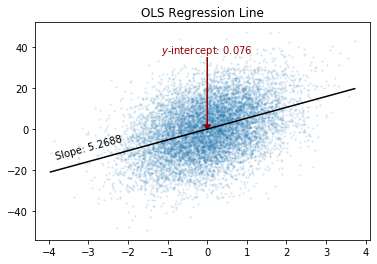

In [5]:
fig, ax = plt.subplots()
ax.scatter(df.x, df.y, s = 2, alpha = 0.1)

# reg line
x_vals = np.linspace(df.x.min(), df.x.max(), 2)
y_vals = results.params['const'] + results.params['x'] * x_vals
ax.plot(x_vals, y_vals, color = 'black')

##### Labels

## Label the Slope
slope_angle = math.degrees( math.atan(results.params['x']) )
text_x = -3
text_y = results.params['const'] + results.params['x'] * text_x

# convert slope_angle based on graph coordinate system
dummy_array = np.array([0,0]) # doesn't matter what pair you use
plot_angle = plt.gca().transData.transform_angles(np.array((slope_angle,)),
                                                  dummy_array.reshape((1,2)))[0]

# add sloped text
ax.text(text_x, text_y,
        "Slope: " + str(round(results.params['x'],4)), rotation = plot_angle,
        ha = 'center', va= 'bottom')


## Label the Intercept
text_x = 0
text_y = 35 # not the intercept
ax.text(text_x, text_y,
        "$y$-intercept: " + str(round(results.params['const'],4)),
        rotation = 0, ha = 'center', va= 'bottom', color = 'darkred')

# draw an arrow from text to the intercept
dx = 0 - text_x
dy = results.params['const'] - text_y
ax.arrow(text_x, text_y, dx, dy, head_width=0.18, head_length=2, color = 'darkred', 
         length_includes_head = True) 


# Add title
ax.set_title("OLS Regression Line")

plt.show()

###### Residuals

Text(0, 0.5, 'Residuals')

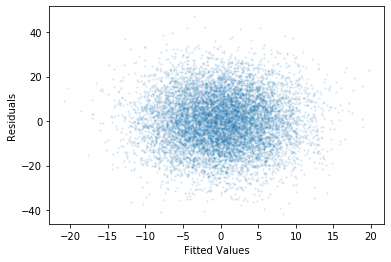

In [6]:
residuals = df.y - df.yhat1

plt.scatter(df.yhat1, residuals, alpha = 0.1, s = 2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

## 2.14 Algebraic Properties of OLS

In [7]:
# compare to ols2

obs = 10

df = pd.DataFrame(index = range(obs))

df['x'] = 9 * np.random.normal(size = obs)
df['u'] = 36 * np.random.normal(size = obs)
df['y'] = 3 + 2*df.x + df.u

X = sm.add_constant(df['x'])
results = sm.OLS(df.y,X).fit()

df['yhat']= results.predict(X)
df['uhat'] = df.y - df.yhat
df['xuhat'] = df.x * df.uhat
df['yhatuhat'] = df.yhat * df.uhat

In [8]:
#print(results.summary())

In [9]:
# add column sums to the bottom of the dataframe
df = df.append(pd.DataFrame(data = df.sum(), columns = ['Sum']).T)

In [10]:
# clean up titles for display
renamings = { 'yhat': '$\hat{y}$',
              'uhat': '$\hat{u}$',
             'xuhat': '$x\hat{u}$',
          'yhatuhat': '$\hat{y}\hat{u}$'}

df.rename(columns = renamings, inplace = True)

df

,x,u,y,$\hat{y}$,$\hat{u}$,$x\hat{u}$,$\hat{y}\hat{u}$
0,-7.014310,-60.517518,-71.546137,-23.079703,-4.846643e+01,3.399586e+02,1.118591e+03
1,7.418117,9.522872,27.359106,12.474765,1.488434e+01,1.104138e+02,1.856787e+02
2,4.394303,22.247136,34.035743,5.025562,2.901018e+01,1.274795e+02,1.457925e+02
3,6.219871,-32.483153,-17.043411,9.522872,-2.656628e+01,-1.652389e+02,-2.529873e+02
4,-1.494845,37.872859,37.883168,-9.482431,4.736560e+01,-7.080424e+01,-4.491410e+02
5,-9.594828,-7.152760,-23.342416,-29.436843,6.094427e+00,-5.847498e+01,-1.794007e+02
6,-8.082396,-23.849426,-37.014219,-25.710949,-1.130327e+01,9.135751e+01,2.906178e+02
7,-9.317614,-8.555705,-24.190934,-28.753924,4.562990e+00,-4.251618e+01,-1.312039e+02
8,11.483755,-24.911652,1.055857,22.490517,-2.143466e+01,-2.461504e+02,-4.820766e+02
9,-14.697279,-9.759129,-36.153688,-42.006798,5.853109e+00,-8.602478e+01,-2.458704e+02


## Expected value of OLS

In [11]:
# compare to ols3

In [12]:
simulated_betas = list()

for sim in range(1000):

    obs = 10000

    df = pd.DataFrame(index = range(obs))

    df['x'] = 9 * np.random.normal(size = obs)
    df['u'] = 36 * np.random.normal(size = obs)
    df['y'] = 3 + 2*df.x + df.u

    X = sm.add_constant(df['x'])
    results = sm.OLS(df.y,X).fit()
    
    bhat = results.params['x']
    simulated_betas.append(bhat)

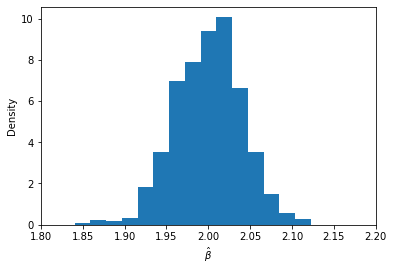

In [13]:
plt.hist(simulated_betas, density = True, bins = 15)
plt.xlabel(r"$\hat{\beta}$")
plt.ylabel("Density")
plt.xlim([1.8,2.2])
plt.show()

In [14]:
print('Standard deviation in the estimator:', 
              round(np.std(simulated_betas),4))

Standard deviation in the estimator: 0.0397


## 2.24 Regression anatomy theorem

In [15]:
url = 'https://github.com/scunning1975/mixtape/raw/master/auto.dta'

df = pd.read_stata(url)

In [16]:
# Model 1
X = df[['length']]
X = sm.add_constant(X)

y = df.price

results1 = sm.OLS(y,X).fit()

# Model 2
X = df[['length', 'weight', 'headroom', 'mpg']]
X = sm.add_constant(X)

results2 = sm.OLS(y, X).fit()

# Auxillary 
X = df[['weight', 'headroom', 'mpg']]
X = sm.add_constant(X)

results_aux = sm.OLS(df.length, X).fit()
length_resids = df.length - results_aux.predict(X)

# Use the residuals
X = sm.add_constant(length_resids)
results_resid = sm.OLS(df.price, X).fit()

In [17]:
print(results1.summary()) # short regression

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     16.50
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           0.000122
Time:                        21:06:09   Log-Likelihood:                -688.08
No. Observations:                  74   AIC:                             1380.
Df Residuals:                      72   BIC:                             1385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4584.8990   2664.437     -1.721      0.0

In [18]:
print(results2.summary()) # long regression

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     10.21
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           1.49e-06
Time:                        21:06:09   Log-Likelihood:                -678.50
No. Observations:                  74   AIC:                             1367.
Df Residuals:                      69   BIC:                             1379.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.418e+04   5872.766      2.414      0.0

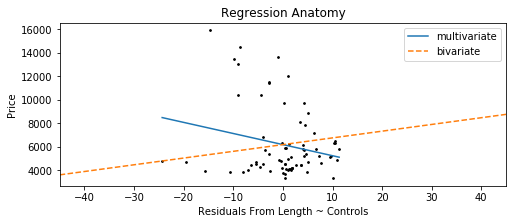

In [19]:
fig, ax = plt.subplots(figsize = (8,3))

ax.scatter(length_resids, df.price, color = 'black', s = 3)

# Multivariate slope line
x1 = np.linspace( length_resids.min(), length_resids.max() , 2) 
y1 = results_resid.params['const'] + x1*results_resid.params[0] # price ~ length residuals

# Bivariate slope line
x2 = np.linspace(-45,45,2)
intercept = - results1.params['length']*np.mean(length_resids) + df.price.mean() # I think
y2 = intercept + x2*results1.params['length']

# Add the lines to the plots
ax.plot(x1, y1, label = 'multivariate')
ax.plot(x2, y2, linestyle = 'dashed', label = 'bivariate')

# Prettifications 
ax.set_xlim([-45,45])
ax.set_title("Regression Anatomy")
ax.set_ylabel("Price")
ax.set_xlabel("Residuals From Length ~ Controls")
ax.legend()
plt.show()